In [18]:
import pandas as pd

def analyze_techniques(csv_file):
    """
    Analyzes the techniques used per Source ID (group), finds the most common techniques,
    and identifies techniques that are unique to each group.
    
    Args:
        csv_file (str): The path to the CSV file.
    
    Returns:
        tuple: 
            - A dictionary of unique techniques per Source ID.
            - A DataFrame of the most common techniques.
            - A dictionary of techniques that are only used by one group (unique per group).
    """
    # Load the 'techniques used' sheet
    df = pd.read_excel(csv_file, sheet_name='techniques used')

    # Extract relevant columns: 'source ID', 'source name', 'target ID', and 'target name'
    data = df[['source ID', 'source name', 'target ID', 'target name', 'mapping description']]

    # 1. Unique Techniques per Source ID (Group)
    unique_techniques_per_group = data.groupby('source name')['target ID'].unique().to_dict()

    # 2. Count Occurrences of Each Technique (target ID) across all groups
    technique_counts = data['target ID'].value_counts().reset_index()
    technique_counts.columns = ['target ID', 'count']

    # Join the counts with the 'target name' for readability
    most_common_techniques = technique_counts.merge(data[['target ID', 'target name']].drop_duplicates(), on='target ID')

    # 3. Techniques unique to a single group (used by only one group)
    unique_techniques_per_group_only = {}
    
    # Filter out techniques used by only one group
    techniques_used_once = technique_counts[technique_counts['count'] == 1]['target ID'].tolist()
    
    # Iterate through groups and find techniques that are used by only one group
    for group, techniques in unique_techniques_per_group.items():
        unique_to_group = [tech for tech in techniques if tech in techniques_used_once]
        unique_techniques_per_group_only[group] = unique_to_group

    return unique_techniques_per_group, most_common_techniques, unique_techniques_per_group_only

# Example usage:
csv_file = r"C:\Users\Aakanksha Saha\Downloads\enterprise-attack-v15.1-groups.xlsx"
unique_techniques_per_group, most_common_techniques, unique_techniques_per_group_only = analyze_techniques(csv_file)

# Print the unique techniques per group
print("Unique Techniques per Group (Source ID):")
for group, techniques in unique_techniques_per_group.items():
    count = len(techniques)
    print(f"{group}: {techniques} (Count: {count})")

# Print the most common techniques across all groups
print("\nMost Common Techniques Across All Groups:")
print(most_common_techniques.head(20))  # Show top 10 most common techniques

empty_count = 0
# Print techniques that are unique to each group
print("\nTechniques Unique to Each Group (Only Used by One Group):")
for group, techniques in unique_techniques_per_group_only.items():
    print(f"{group}: {techniques}")  
    if not techniques:  # If the list is empty
        empty_count += 1

print(f"\nTotal number of groups with empty techniques list: {empty_count}")


Unique Techniques per Group (Source ID):
APT-C-36: ['T1105' 'T1204.002' 'T1036.004' 'T1571' 'T1027' 'T1053.005' 'T1566.001'
 'T1588.002' 'T1059.005'] (Count: 9)
APT1: ['T1560.001' 'T1119' 'T1005' 'T1583.001' 'T1584.001' 'T1585.002'
 'T1003.001' 'T1087.001' 'T1114.001' 'T1588.001' 'T1036.005' 'T1135'
 'T1550.002' 'T1057' 'T1021.001' 'T1114.002' 'T1566.001' 'T1566.002'
 'T1016' 'T1049' 'T1007' 'T1588.002' 'T1059.003'] (Count: 23)
APT12: ['T1102.002' 'T1568.003' 'T1203' 'T1204.002' 'T1566.001'] (Count: 5)
APT16: ['T1584.004'] (Count: 1)
APT17: ['T1585' 'T1583.006'] (Count: 2)
APT18: ['T1053.002' 'T1071.004' 'T1027.013' 'T1133' 'T1070.004' 'T1083' 'T1105'
 'T1547.001' 'T1082' 'T1078' 'T1071.001' 'T1059.003'] (Count: 12)
APT19: ['T1027.010' 'T1059' 'T1574.002' 'T1140' 'T1189' 'T1027.013' 'T1564.003'
 'T1204.002' 'T1112' 'T1059.001' 'T1547.001' 'T1218.010' 'T1218.011'
 'T1566.001' 'T1132.001' 'T1082' 'T1016' 'T1033' 'T1588.002' 'T1071.001'
 'T1543.003'] (Count: 21)
APT28: ['T1098.002' 'T1550

In [5]:
csv_file = r"C:\Users\Aakanksha Saha\Downloads\enterprise-attack-v15.1-groups.xlsx"

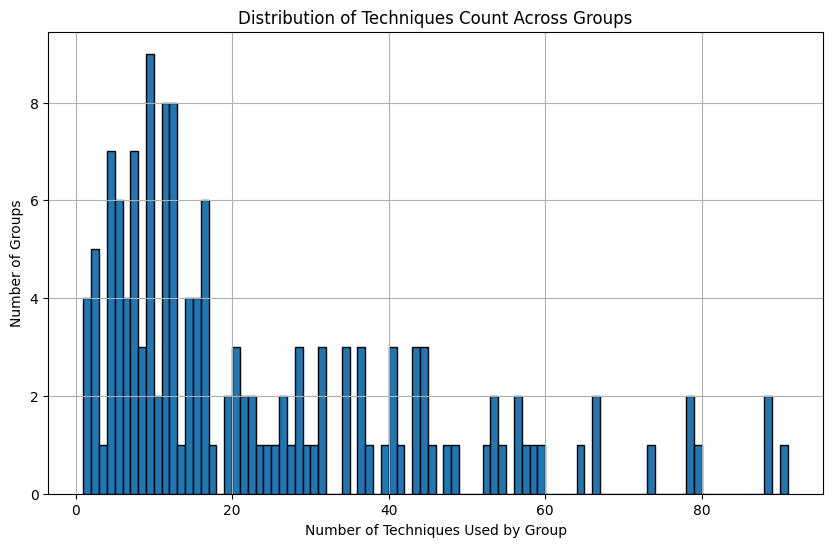


Most Common Techniques Across All Groups:
    target ID  count                             target name
0   T1204.002     79                          Malicious File
1       T1105     76                   Ingress Tool Transfer
2   T1566.001     72                Spearphishing Attachment
3   T1059.001     69                              PowerShell
4   T1588.002     66                                    Tool
5   T1059.003     60                   Windows Command Shell
6   T1036.005     50       Match Legitimate Name or Location
7   T1547.001     50      Registry Run Keys / Startup Folder
8   T1071.001     47                           Web Protocols
9       T1082     46            System Information Discovery
10  T1053.005     44                          Scheduled Task
11  T1059.005     42                            Visual Basic
12  T1566.002     41                      Spearphishing Link
13      T1083     41            File and Directory Discovery
14  T1204.001     39                      

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_techniques(csv_file):
    """
    Analyzes the techniques used per Source ID (group), finds the most common techniques,
    identifies techniques that are unique to each group, and calculates statistics (mean, median, 
    standard deviation, quartiles) for the number of techniques used per group.
    
    Args:
        csv_file (str): The path to the CSV file.
    
    Returns:
        tuple: 
            - A dictionary of unique techniques per Source ID.
            - A DataFrame of the most common techniques.
            - A dictionary of techniques that are only used by one group (unique per group).
            - Various statistics (mean, median, standard deviation, quartiles).
    """
    # Load the 'techniques used' sheet
    df = pd.read_excel(csv_file, sheet_name='techniques used')

    # Extract relevant columns: 'source ID', 'source name', 'target ID', and 'target name'
    data = df[['source ID', 'source name', 'target ID', 'target name', 'mapping description']]

    # 1. Unique Techniques per Source ID (Group)
    unique_techniques_per_group = data.groupby('source name')['target ID'].unique().to_dict()

    # 2. Count Occurrences of Each Technique (target ID) across all groups
    technique_counts = data['target ID'].value_counts().reset_index()
    technique_counts.columns = ['target ID', 'count']

    # Join the counts with the 'target name' for readability
    most_common_techniques = technique_counts.merge(data[['target ID', 'target name']].drop_duplicates(), on='target ID')

    # 3. Techniques unique to a single group (used by only one group)
    unique_techniques_per_group_only = {}
    
    # Filter out techniques used by only one group
    techniques_used_once = technique_counts[technique_counts['count'] == 1]['target ID'].tolist()
    
    # Iterate through groups and find techniques that are used by only one group
    for group, techniques in unique_techniques_per_group.items():
        unique_to_group = [tech for tech in techniques if tech in techniques_used_once]
        unique_techniques_per_group_only[group] = unique_to_group

    # 4. Calculate statistics (mean, median, std, quartiles) of techniques per group
    techniques_per_group = [len(techniques) for techniques in unique_techniques_per_group.values()]
    techniques_series = pd.Series(techniques_per_group)
    
    mean_techniques_per_group = techniques_series.mean()
    median_techniques_per_group = techniques_series.median()
    std_techniques_per_group = techniques_series.std()
    min_techniques_per_group = techniques_series.min()
    max_techniques_per_group = techniques_series.max()
    quartiles = techniques_series.quantile([0.25, 0.5, 0.75])
    mode_techniques_per_group = techniques_series.mode()[0]

    # 5. Generate a histogram (chart) of the number of techniques used per group
    plt.figure(figsize=(10, 6))
    plt.hist(techniques_per_group, bins=range(min_techniques_per_group, max_techniques_per_group + 1), edgecolor='black')
    plt.title('Distribution of Techniques Count Across Groups')
    plt.xlabel('Number of Techniques Used by Group')
    plt.ylabel('Number of Groups')
    plt.grid(True)
    plt.show()

    return (unique_techniques_per_group, most_common_techniques, 
            unique_techniques_per_group_only, 
            mean_techniques_per_group, median_techniques_per_group, 
            std_techniques_per_group, min_techniques_per_group, 
            max_techniques_per_group, quartiles, mode_techniques_per_group)

# Example usage:
csv_file = r"C:\Users\Aakanksha Saha\Downloads\enterprise-attack-v15.1-groups.xlsx"
(unique_techniques_per_group, most_common_techniques, unique_techniques_per_group_only, 
 mean_techniques_per_group, median_techniques_per_group, 
 std_techniques_per_group, min_techniques_per_group, 
 max_techniques_per_group, quartiles, mode_techniques_per_group) = analyze_techniques(csv_file)

# Print the unique techniques per group
#print("Unique Techniques per Group (Source ID):")
#for group, techniques in unique_techniques_per_group.items():
#    count = len(techniques)
#    print(f"{group}: {techniques} (Count: {count})")

# Print the most common techniques across all groups
print("\nMost Common Techniques Across All Groups:")
print(most_common_techniques.head(20))  # Show top 10 most common techniques

#empty_count = 0
# Print techniques that are unique to each group
#print("\nTechniques Unique to Each Group (Only Used by One Group):")
#for group, techniques in unique_techniques_per_group_only.items():
#    print(f"{group}: {techniques}")  
#    if not techniques:  # If the list is empty
#        empty_count += 1

#print(f"\nTotal number of groups with empty techniques list: {empty_count}")

# Print statistical summary of techniques used by groups
print(f"\nMean number of techniques used per group: {mean_techniques_per_group}")
print(f"Median number of techniques used per group: {median_techniques_per_group}")
print(f"Standard deviation of techniques per group: {std_techniques_per_group}")
print(f"Minimum number of techniques used by any group: {min_techniques_per_group}")
print(f"Maximum number of techniques used by any group: {max_techniques_per_group}")
print(f"Quartiles (25th, 50th, 75th percentiles):\n{quartiles}")
print(f"Most common number of techniques used by groups (mode): {mode_techniques_per_group}")
